In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 파일 업로드

In [3]:
train = pd.read_csv('/content/drive/MyDrive/DNA/신약개발/train.csv')
test = pd.read_csv('/content/drive/MyDrive/DNA/신약개발/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/DNA/신약개발/sample_submission.csv')

# 데이터 확인

In [4]:
train.head()

,id,SMILES,MLM,HLM,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea
0,TRAIN_0000,CCOc1ccc(CNC(=O)c2cc(-c3sc(C)nc3C)n[nH]2)cc1OCC,26.010,50.680,3.259,400.495,5,2,8,3.259,117.37
1,TRAIN_0001,Cc1nc(C)c(CN2CC(C)C(=O)Nc3ccccc32)s1,29.270,50.590,2.169,301.407,2,1,2,2.172,73.47
2,TRAIN_0002,CCCN1CCN(c2nn3nnnc3c3ccccc23)CC1,5.586,80.892,1.593,297.358,5,0,3,1.585,62.45
3,TRAIN_0003,Cc1ccc(-c2ccc(-n3nc(C)c(S(=O)(=O)N4CCN(C5CCCCC...,5.710,2.000,4.771,494.652,6,0,5,3.475,92.60
4,TRAIN_0004,Cc1ccc2c(c1)N(C(=O)c1ccncc1)CC(C)O2,93.270,99.990,2.335,268.310,3,0,1,2.337,42.43


In [5]:
test.head()

,id,SMILES,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea
0,TEST_000,CC(C)Nc1ccnc(N2CCN(Cc3cccs3)C(CCO)C2)n1,2.641,361.505,4,2,7,2.635,92.76
1,TEST_001,COc1cc(=O)n(-c2ccccc2)cc1C(=O)N1CCC2(CC1)OCCO2,0.585,370.399,5,0,3,0.585,68.31
2,TEST_002,Cc1cccc(NC(=N)/N=c2\nc(O)c(Cc3ccccc3)c(C)[nH]2)c1,4.276,347.414,4,4,5,4.290,92.86
3,TEST_003,O=C(c1nc2ncccn2n1)N1CCCn2cc(-c3ccccc3)nc21,1.795,345.358,5,0,2,1.795,81.21
4,TEST_004,CCN1CCN(C(=O)c2cc3c(=O)n4cc(C)ccc4nc3n2C)CC1,1.219,353.418,4,0,2,0.169,61.15


In [6]:
submission.head()

,id,MLM,HLM
0,TEST_000,0,0
1,TEST_001,0,0
2,TEST_002,0,0
3,TEST_003,0,0
4,TEST_004,0,0


# 결측치 확인

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3498 entries, 0 to 3497
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          3498 non-null   object 
 1   SMILES                      3498 non-null   object 
 2   MLM                         3498 non-null   float64
 3   HLM                         3498 non-null   float64
 4   AlogP                       3496 non-null   float64
 5   Molecular_Weight            3498 non-null   float64
 6   Num_H_Acceptors             3498 non-null   int64  
 7   Num_H_Donors                3498 non-null   int64  
 8   Num_RotatableBonds          3498 non-null   int64  
 9   LogD                        3498 non-null   float64
 10  Molecular_PolarSurfaceArea  3498 non-null   float64
dtypes: float64(6), int64(3), object(2)
memory usage: 300.7+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483 entries, 0 to 482
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          483 non-null    object 
 1   SMILES                      483 non-null    object 
 2   AlogP                       482 non-null    float64
 3   Molecular_Weight            483 non-null    float64
 4   Num_H_Acceptors             483 non-null    int64  
 5   Num_H_Donors                483 non-null    int64  
 6   Num_RotatableBonds          483 non-null    int64  
 7   LogD                        483 non-null    float64
 8   Molecular_PolarSurfaceArea  483 non-null    float64
dtypes: float64(4), int64(3), object(2)
memory usage: 34.1+ KB


In [9]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483 entries, 0 to 482
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      483 non-null    object
 1   MLM     483 non-null    int64 
 2   HLM     483 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 11.4+ KB


# 시각화 연습

# rdkit

In [10]:
!pip install rdkit-pypi #설치

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 31.8 MB/s eta 0:00:00


In [11]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
flights = sns.load_dataset('flights')

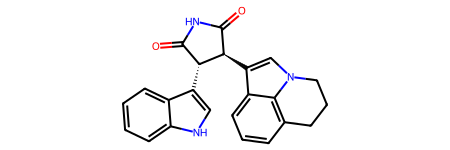

In [12]:
IPythonConsole.ipython_useSVG=True


def mol_with_atom_index(mol):
   for atom in mol.GetAtoms():
    atom.SetAtomMapNum(atom.GetIdx())
    return mol


# Test in a kinase inhibitor
mol = Chem.MolFromSmiles("C1CC2=C3C(=CC=C2)C(=CN3C1)[C@H]4[C@@H](C(=O)NC4=O)C5=CNC6=CC=CC=C65")
# Default
mol

# 하이라이트,강조 (예시)

((3, 4, 5), (8, 9, 7))


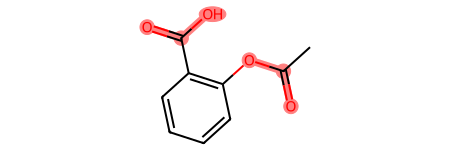

In [13]:
m = Chem.MolFromSmiles('c1cc(C(=O)O)c(OC(=O)C)cc1')
substructure = Chem.MolFromSmarts('C(=O)O')
print(m.GetSubstructMatches(substructure))
m

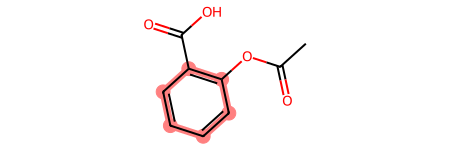

In [14]:
m.__sssAtoms = [0,1,2,6,11,12]
m

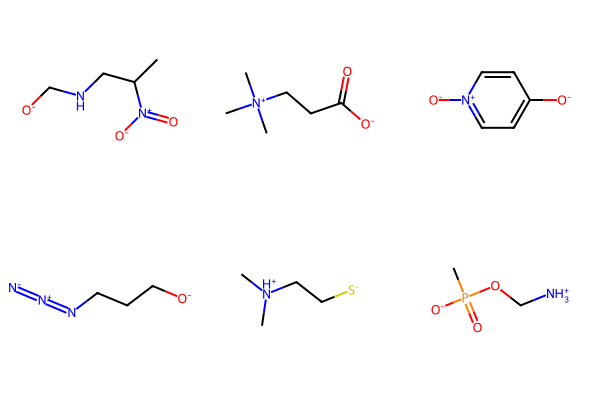

In [15]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw



# list of SMILES
smiList = ['CC(CNC[O-])[N+]([O-])=O',
           'C[N+](C)(C)CCC([O-])=O',
           '[O-]C1=CC=[N+]([O-])C=C1',
           '[O-]CCCN=[N+]=[N-]',
           'C[NH+](C)CC[S-]',
           'CP([O-])(=O)OC[NH3+]']


# Create RDKit molecular objects
mols = [Chem.MolFromSmiles(m) for m in smiList]


# display
Draw.MolsToGridImage(mols,molsPerRow=3,subImgSize=(200,200))

#EDA

In [16]:
from rdkit import Chem

In [17]:
train['mol'] = train['SMILES'].apply(lambda x: Chem.MolFromSmiles(x))
test['mol'] = test['SMILES'].apply(lambda x: Chem.MolFromSmiles(x))

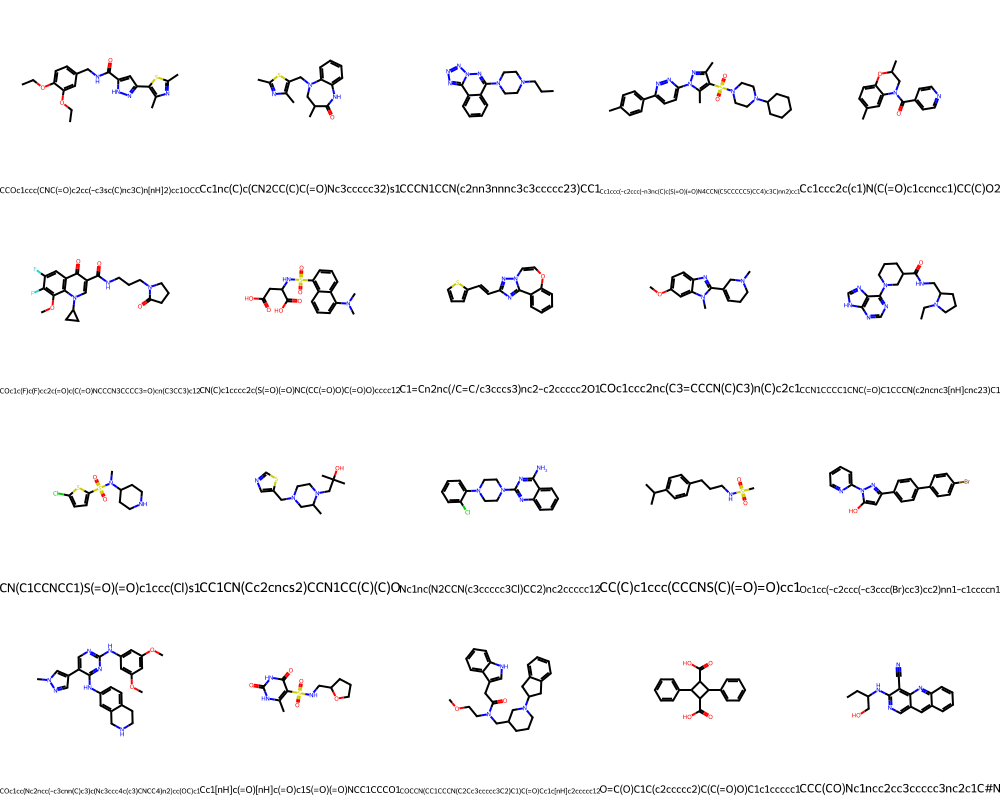

In [18]:
from rdkit.Chem import Draw
mols = train['mol'][:20]

Draw.MolsToGridImage(mols, molsPerRow=5, useSVG=True, legends=list(train['SMILES'][:20].values))

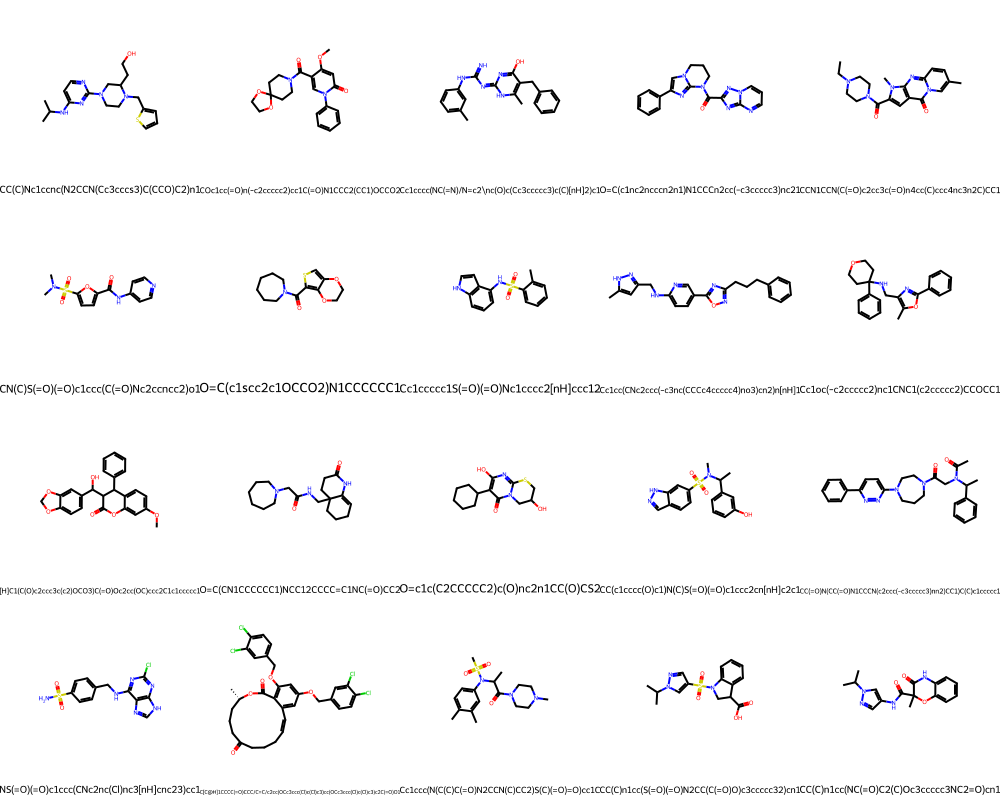

In [19]:
from rdkit.Chem import Draw
mols = test['mol'][:20]

Draw.MolsToGridImage(mols, molsPerRow=5, useSVG=True, legends=list(test['SMILES'][:20].values))

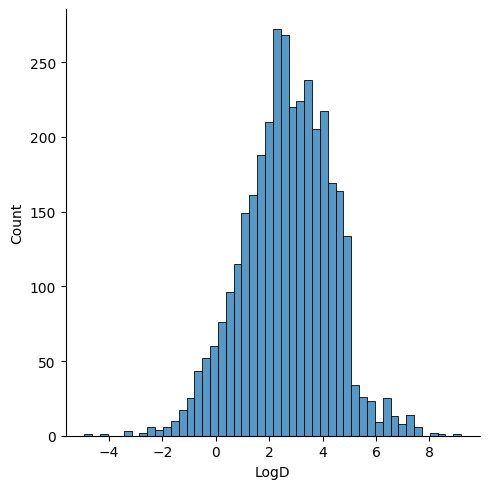

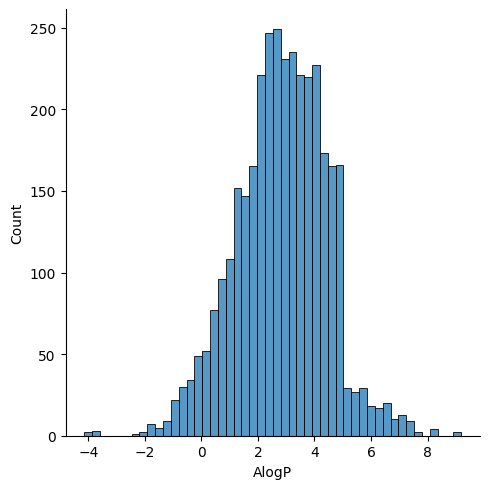

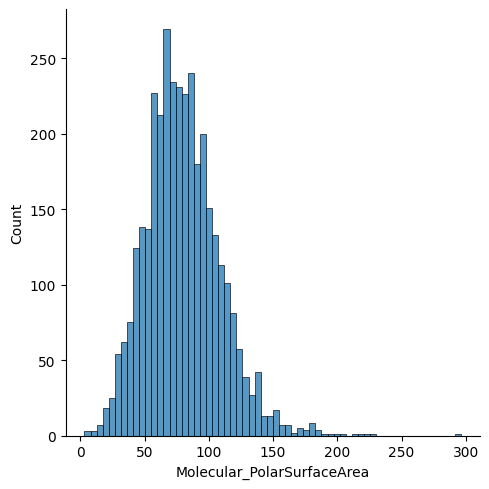

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(train['LogD'])
sns.displot(train['AlogP'])
sns.displot(train['Molecular_PolarSurfaceArea'])
plt.show()

In [21]:
from rdkit import DataStructs #rdkit fingerprint 생성 함수 포함 모듈
Chem.RDKFingerprint(m)

from rdkit.Chem import MACCSkeys
MACCSkeys.GenMACCSKeys(m)

from rdkit.Chem import AllChem
AllChem.GetMorganFingerprint(m, 2) #두번째 매개변수로는 radius를 입력
#더 공부해봐야 함.

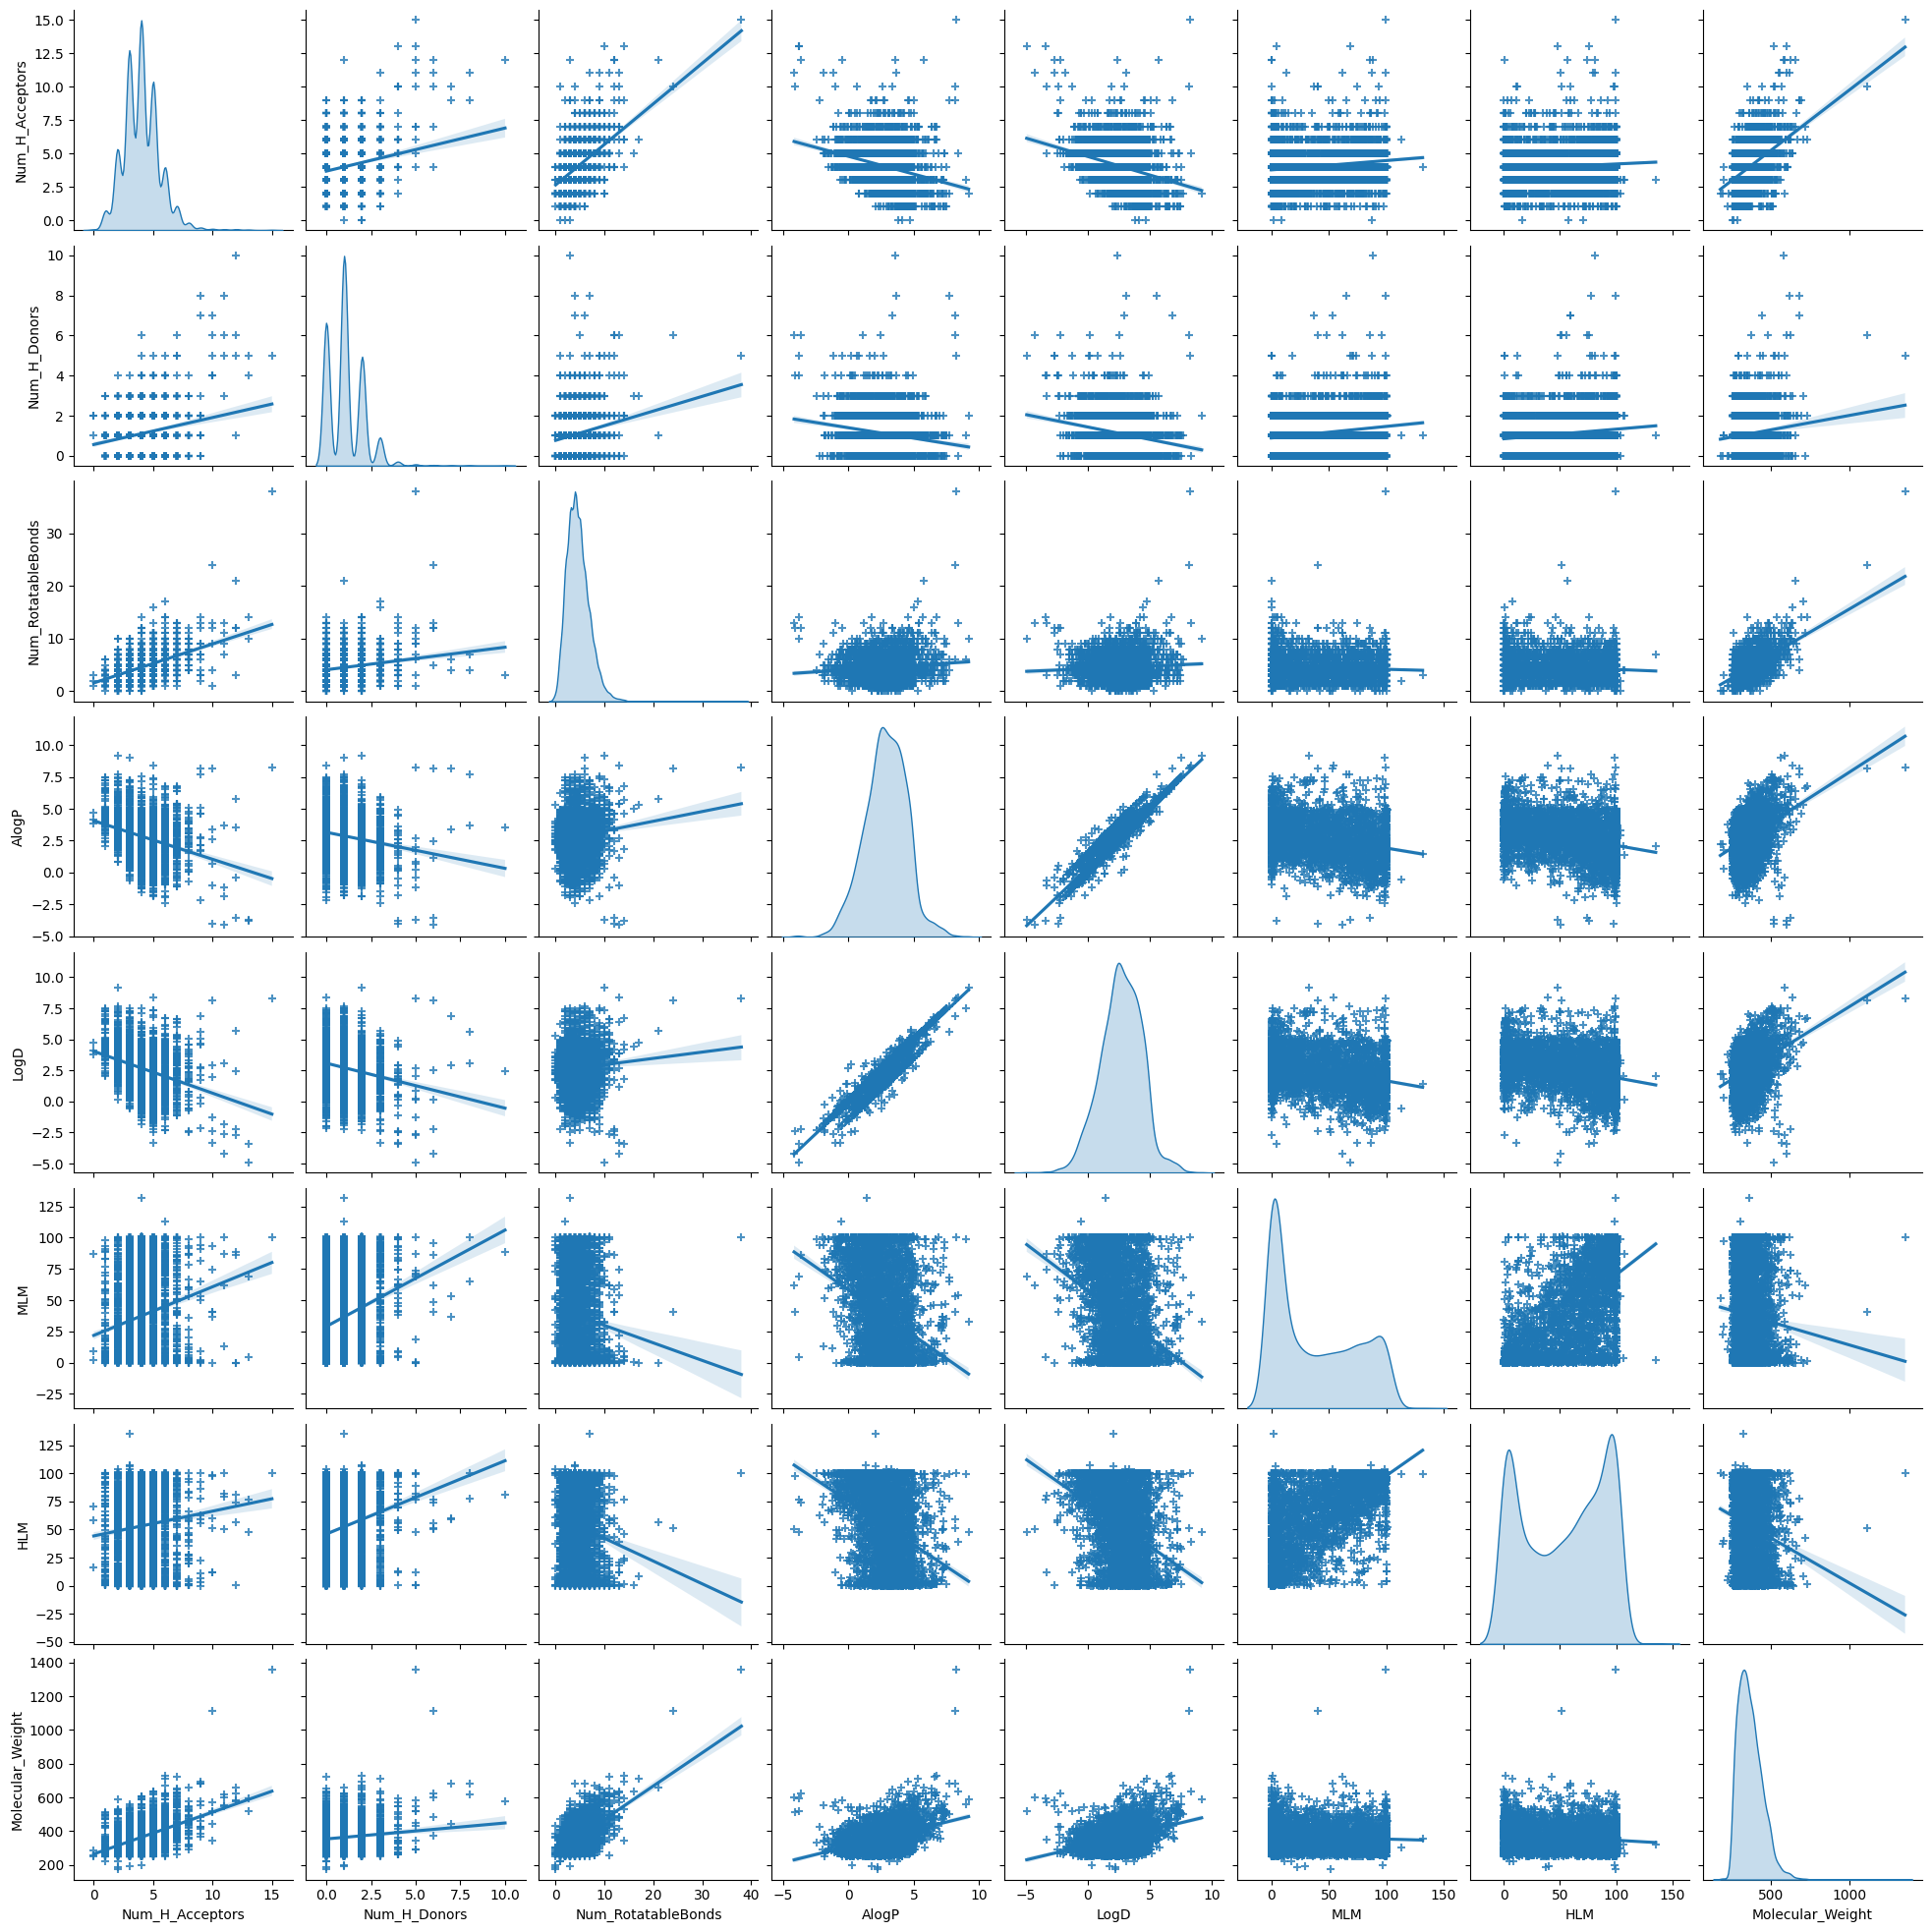

In [27]:
sns.pairplot(train[['Num_H_Acceptors','Num_H_Donors','Num_RotatableBonds','AlogP','LogD','MLM','HLM','Molecular_Weight']], diag_kind='kde', kind='reg', markers='+')
plt.show()

<ipython-input-24-700e9a471e54>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot=True, linewidths=2)


<Axes: >

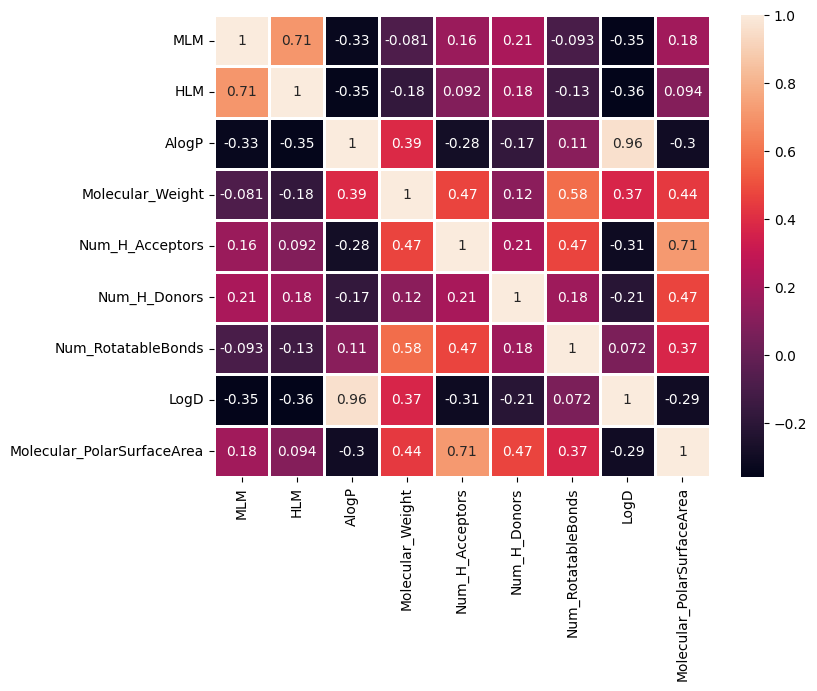

In [24]:
plt.subplots(figsize=(8,6))
sns.heatmap(train.corr(), annot=True, linewidths=2)